# Tutorial for **TITLE**. 

This tutorial shows how to access the data related to [DANDI:000718](https://dandiarchive.org/dandiset/000718/draft) using `pynwb`. 

This dataset contains sessions with the 1-photon calcium imaging, calcium imaging segmentation, freezing behavior, EEG, EMG signals  and other sessions with calcium imaging, calcium imaging segmentation, sleep behavior, EEG, EMG signals along with subject and session metadata.

Contents:

- [Streaming an NWB file](#stream-nwb)
- [Reading an NWB file](#read-nwb)
- [Access Subject and Session metadata](#access-subject)
- [Access Raw Imaging](#access-raw-imaging)
- [Access Processed Imaging](#access-raw-imaging)
- [Access EEG or Emg Traces](#access-eeg)
- [Access Freezing Behavior](#access-freezing)
- [Access Sleep Classification](#access-sleep)

A schematic representation where the source data is saved in NWB:

![Alt text](./conversion_outline_diagram.png)

# Select the subject and session you want to load

In [34]:
subject_id = "Ca_EEG3-4"
task = "NeutralExposure"
# nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}_behavior+ophys.nwb"
nwbfile_path = f"D:/cai_lab_conversion_nwb/{subject_id}_{task}.nwb"


# Streaming an NWB file <a id="stream-nwb"></a>

This section demonstrates how to access the files on the [DANDI Archive](https://dandiarchive.org) without downloading them. Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

The `dandi.dandiapi.DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive.

In [ ]:
from dandi.dandiapi import DandiAPIClient

dandiset_id = "000718"

with DandiAPIClient() as client:
    client.dandi_authenticate() #This line is necessary because the dataset is in embargoed mode and only owners can view the data, once it will be published this line can be removed.
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)


We will use `remfile` for streaming the file. You can read more about `remfile` at [this tutorial section](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html#method-3-remfile).

In [ ]:
import h5py
import remfile

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [35]:
from pynwb import NWBHDF5IO
# io = NWBHDF5IO(file=h5_file, load_namespaces=True)
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()
nwbfile

C:\Users\Utente\anaconda3\envs\cai_lab_to_nwb_env\Lib\site-packages\pynwb\image.py:106: UserWarning: OnePhotonSeries 'corrected': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warnings.warn(


root pynwb.file.NWBFile at 0x1562186989488
Fields:
  acquisition: {
    ActivitySignal <class 'pynwb.base.TimeSeries'>,
    EEGSignal <class 'pynwb.base.TimeSeries'>,
    EMGSignal <class 'pynwb.base.TimeSeries'>,
    OnePhotonSeries <class 'pynwb.ophys.OnePhotonSeries'>,
    TemperatureSignal <class 'pynwb.base.TimeSeries'>,
    Video Ca_EEG3-4_NeutralExposure <class 'pynwb.image.ImageSeries'>
  }
  devices: {
    HD-X02, Data Science International <class 'pynwb.device.Device'>,
    Microscope <class 'abc.Miniscope'>
  }
  experimenter: ['Cai, Denise' 'Morales-Rodriguez, Denisse' 'Bacon, Madeline E.'
 'Ko, BumJin' 'Francisco, Taylor R.' 'LaBanca, Alexa R.'
 'Sompolpong, Patlapa' 'Dong, Zhe' 'Lamsifer, Sophia' 'Chen, Hung-Tu'
 'Carrillo Segura, SimÃ³n' 'Christenson Wick, ZoÃ©' 'Silva, Alcino J.'
 'Rajan, Kanaka' 'van der Meer, Matthijs' 'Fenton, AndrÃ©'
 'Shuman, Tristan' 'Zaki, Yosif']
  file_create_date: [datetime.datetime(2024, 10, 29, 12, 53, 19, 39217, tzinfo=tzoffset(None, 3600))]
  identifier: e71f67f3-6ede-47dd-b700-79dc5b20f2ba
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Icahn School of Medicine at Mount Sinai
  keywords: <StrDataset for HDF5 dataset "keywords": shape (10,), type "|O">
  lab: Cai
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://www.biorxiv.org/content/10.1101/2023.03.13.532469v2']
  session_description: A rich text description of the experiment. Can also just be the abstract of the publication.
  session_start_time: 2022-09-17 09:23:03.102000+02:00
  source_script: Created using NeuroConv v0.6.5
  source_script_file_name: C:\Users\Utente\CatalystNeuro\neuroconv\src\neuroconv\basedatainterface.py
  subject: subject pynwb.file.Subject at 0x1562197947456
Fields:
  age: P12W/P15W
  age__reference: birth
  sex: U
  species: Mus musculus
  subject_id: Ca_EEG3-4

  timestamps_reference_time: 2022-09-17 09:23:03.102000+02:00

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from all_sessions.Session datajoint table.

In [36]:
nwbfile.session_start_time

datetime.datetime(2022, 9, 17, 9, 23, 3, 102000, tzinfo=tzoffset(None, 7200))

The experimenta description or the session description ccan be easly access with `nwbfile.experiment_description` and `nwbfile.session_description` 

In [37]:
nwbfile.experiment_description

In [38]:
nwbfile.session_description

'A rich text description of the experiment. Can also just be the abstract of the publication.'

# Access subject <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [39]:
nwbfile.subject

subject pynwb.file.Subject at 0x1562197947456
Fields:
  age: P12W/P15W
  age__reference: birth
  sex: U
  species: Mus musculus
  subject_id: Ca_EEG3-4

# Access OnePhoton Imaging

This section demonstraces how to access the raw One Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw OnePhoton Imaging <a name="access-imaging"></a>

The raw OnePhoton imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (for each channel and plane separately) which is added to `nwbfile.acquisition`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [40]:
photon_series_name = "OnePhotonSeries"

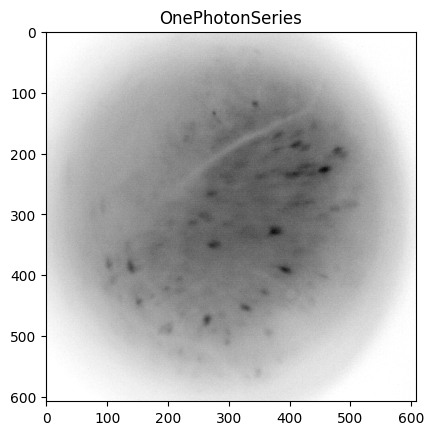

In [41]:
# Visualize the imaging data.
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
photon_series = nwbfile.acquisition[photon_series_name]
ax.imshow(photon_series.data[70], cmap="binary")
ax.set_title(photon_series_name)
plt.show()


Imaging metadata include information on the **device** used to acquire the image and the **optical channel** specs contained in the imaging plane object

In [42]:
nwbfile.devices["Microscope"]

Microscope abc.Miniscope at 0x1562197774784
Fields:
  ROI: <HDF5 dataset "ROI": shape (2,), type "<i4">
  compression: FFV1
  description: The Miniscope is the head-mounted miniature microscope part of the UCLA Miniscope imaging platform.
  deviceType: Miniscope_V4_BNO
  frameRate: 30FPS
  framesPerFile: 1000
  gain: 3.5
  led0: 1

In [43]:
nwbfile.imaging_planes["ImagingPlane"]

ImagingPlane pynwb.ophys.ImagingPlane at 0x1562196700688
Fields:
  conversion: 1.0
  description: Imaging plane for Miniscope imaging data.
  device: Microscope abc.Miniscope at 0x1562197774784
Fields:
  ROI: <HDF5 dataset "ROI": shape (2,), type "<i4">
  compression: FFV1
  description: The Miniscope is the head-mounted miniature microscope part of the UCLA Miniscope imaging platform.
  deviceType: Miniscope_V4_BNO
  frameRate: 30FPS
  framesPerFile: 1000
  gain: 3.5
  led0: 1

  excitation_lambda: 496.0
  grid_spacing_unit: meters
  imaging_rate: 30.0
  indicator: GCaMP6f
  location: CA1
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

## Accessing the segmentation data

The segmentation output for the One Photon Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationChannel_number_Plane_number_"]`.


In [44]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x1562196131472
Fields:
  data_interfaces: {
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    MotionCorrection <class 'pynwb.ophys.MotionCorrection'>,
    SegmentationImages <class 'pynwb.base.Images'>
  }
  description: No description.

#### Plot Maximum Projection Image

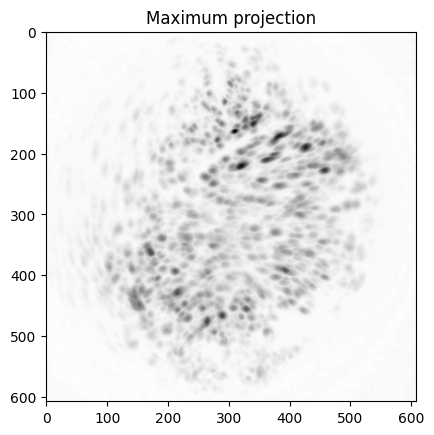

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
max_projection_image = nwbfile.processing["ophys"]["SegmentationImages"].images["maximum_projection"]
ax.imshow(max_projection_image.data[:], cmap="binary")
ax.set_title("Maximum projection")
plt.show()

#### Plot Image Segmentation

In [46]:
plane_segmentation_names = list(nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations.keys())
_ = [print(name) for name in nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations.keys()]

BackgroundPlaneSegmentation
PlaneSegmentation


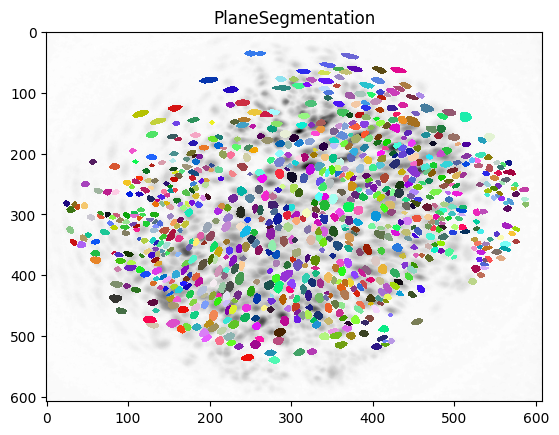

In [47]:
import random
from matplotlib.colors import ListedColormap
plane_seg_name = "PlaneSegmentation"
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)   
plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations[plane_seg_name]
ax.imshow(max_projection_image.data[:], cmap="binary")
for image_mask in plane_segmentation.image_mask:
    random_color = [random.random() for _ in range(3)] + [1]
    custom_cmap = ListedColormap([[0, 0, 0, 0], random_color])
    ax.imshow(image_mask.T, aspect="auto", cmap=custom_cmap)
ax.set_title(plane_seg_name)
plt.show()

## Visualize fluorescence traces
The fluroscence traces are stored in a [Fluorescence](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.Fluorescence) container, the raw traces can be accessed as `nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]`.

In [51]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

fluorescence_traces_names = [name for name in nwbfile.processing["ophys"]["Fluorescence"].roi_response_series.keys()]

fluorescence_traces_name = fluorescence_traces_names[2]
fluorescence_traces = nwbfile.processing["ophys"]["Fluorescence"][fluorescence_traces_name].data[:, :10]
df = pd.DataFrame(fluorescence_traces)
df["time"] = nwbfile.processing["ophys"]["Fluorescence"][fluorescence_traces_name].timestamps[:]
df.set_index("time", inplace=True)
df.columns.name = 'ROIs'

import plotly.express as px

fig = px.line(df, facet_row="ROIs", facet_row_spacing=0.01)

# hide and lock down axes
fig.update_xaxes(visible=True, fixedrange=False)
fig.update_yaxes(visible=False, fixedrange=False)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white",
    margin=dict(t=10, l=10, b=10, r=10)
)

fig.show(config=dict(displayModeBar=True))

# Access Freezing Behavior <a name="access-freezing"></a>

This section demonstrates how to access the freeze analysis output and metadata.


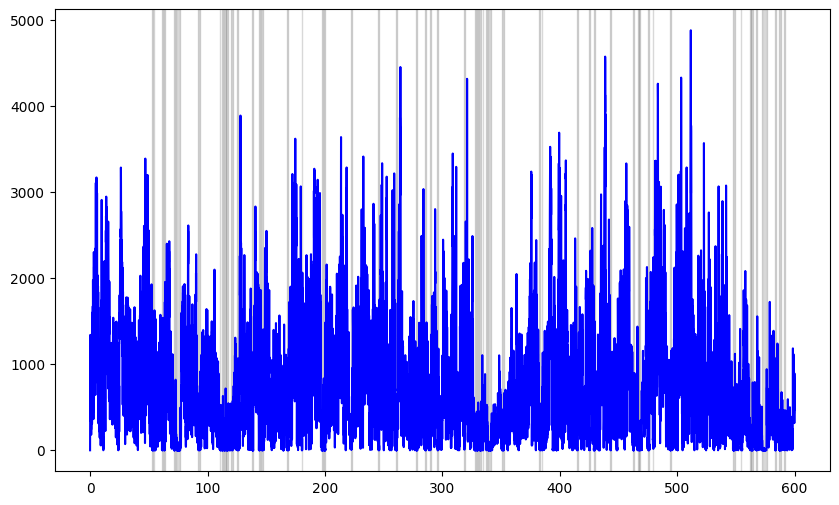

In [53]:
import numpy as np
motion_series = nwbfile.processing["behavior"]["MotionSeries"].data[:]
rate = nwbfile.processing["behavior"]["MotionSeries"].rate
starting_time = nwbfile.processing["behavior"]["MotionSeries"].starting_time
time = np.linspace(starting_time, motion_series.shape[0] / rate, motion_series.shape[0])
start_times = nwbfile.processing["behavior"]["FreezingIntervals"].start_time[:]
stop_times = nwbfile.processing["behavior"]["FreezingIntervals"].stop_time[:]
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Overlay grey boxes for each interval
for start, stop in zip(start_times, stop_times):
    if start > motion_series.shape[0] / rate:
        break
    ax.axvspan(start, stop, color="grey", alpha=0.3)
# Plot the time series
ax.plot(time, motion_series, color="blue", label="Motion Series")
plt.show()

# Access Sleep Classification <a name="access-sleep"></a>

This section demonstrates how to access the sleep classification data.

In [54]:
subject_id = "Ca_EEG3-4"
task = "OfflineDay1Session16"
# nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}_behavior+ophys.nwb"
nwbfile_path = f"D:/cai_lab_conversion_nwb/{subject_id}_{task}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

sleep_intervals = nwbfile.processing["sleep"]["SleepIntervals"].to_dataframe()
sleep_intervals


C:\Users\Utente\anaconda3\envs\cai_lab_to_nwb_env\Lib\site-packages\pynwb\image.py:106: UserWarning:

OnePhotonSeries 'corrected': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension



start_time   stop_time sleep_state
id                                    
0     0.000000    2.566667  quiet wake
1     2.600000   14.600000         sws
2    14.633333   17.600000         rem
3    17.633333   20.600000         sws
4    20.633333   26.600000        wake
5    26.633333   47.600000  quiet wake
6    47.633333   50.600000        wake
7    50.633333   53.566667  quiet wake
8    53.600000   56.600000        wake
9    56.633333  152.600000  quiet wake
10  152.633333  155.600000        wake
11  155.633333  248.600000  quiet wake
12  248.633333  254.600000         sws
13  254.633333  263.600000         rem
14  263.633333  278.600000         sws
15  278.633333  281.600000         rem
16  281.633333  296.600000         sws
17  296.633333  299.600000         rem
18  299.633333  299.633333         sws

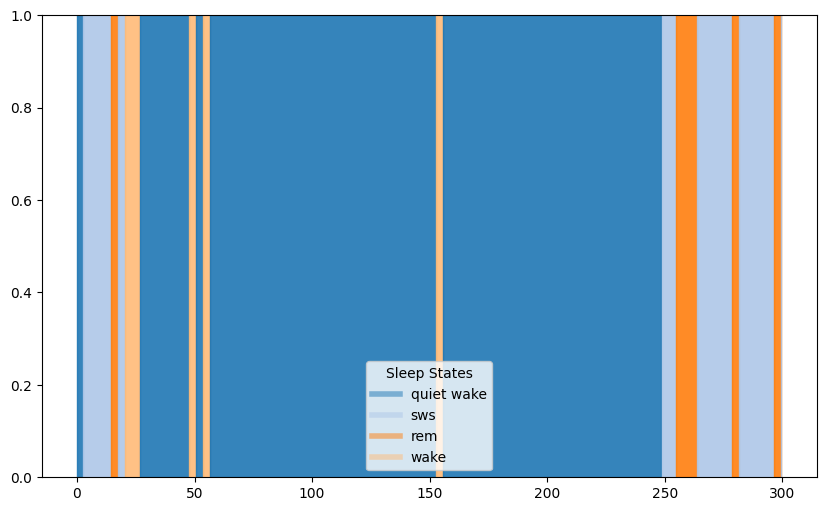

In [55]:
import matplotlib.pyplot as plt

unique_states = sleep_intervals["sleep_state"].unique()
colors = plt.cm.tab20.colors  # Use a color map with enough colors
color_mapping = {state: colors[i % len(colors)] for i, state in enumerate(unique_states)}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Overlay boxes for each interval with dynamically assigned colors
for start, stop, state in zip(sleep_intervals["start_time"], sleep_intervals["stop_time"], sleep_intervals["sleep_state"]):
    ax.axvspan(start, stop, color=color_mapping[state], alpha=0.9, label=state)
# Create a legend with unique sleep states
handles = [plt.Line2D([0], [0], color=color_mapping[state], lw=4, alpha=0.5) for state in unique_states]
ax.legend(handles, unique_states, title="Sleep States")